In [1]:
import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

pd.options.display.float_format = '{:.0f}'.format

In [2]:
flights = pd.read_csv("Data/DelayedFlights.csv")
flights.head()


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003,1955,2211,2225,WN,...,4,8,0,N,0,nan,nan,nan,nan,nan
1,1,2008,1,3,4,754,735,1002,1000,WN,...,5,10,0,N,0,nan,nan,nan,nan,nan
2,2,2008,1,3,4,628,620,804,750,WN,...,3,17,0,N,0,nan,nan,nan,nan,nan
3,4,2008,1,3,4,1829,1755,1959,1925,WN,...,3,10,0,N,0,2,0,0,0,32
4,5,2008,1,3,4,1940,1915,2121,2110,WN,...,4,10,0,N,0,nan,nan,nan,nan,nan


In [9]:
flights.columns

Index(['Month', 'DayOfWeek', 'CRSDepTime', 'UniqueCarrier', 'AirTime',
       'ArrDelay', 'Origin', 'Dest', 'TaxiIn', 'TaxiOut', 'CancellationCode',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'DepDate', 'Status'],
      dtype='object')

In [24]:
flights["Status"].unique()

array([ 0.,  1.,  2.,  3.,  4.])

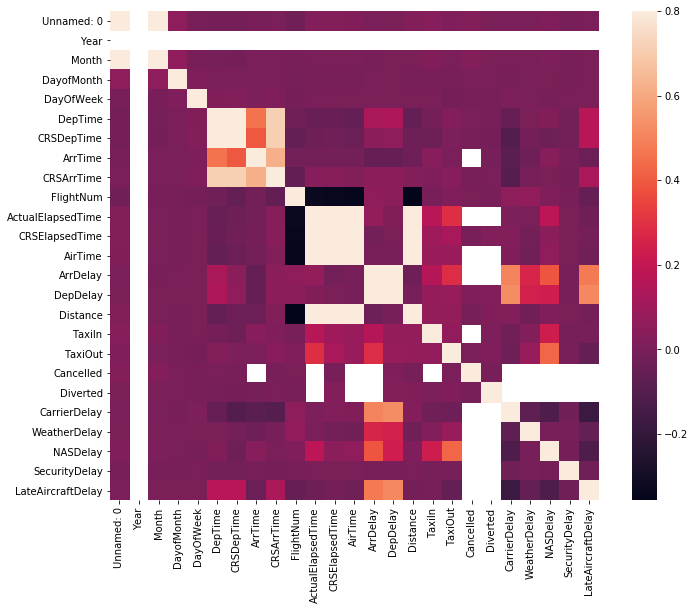

In [3]:
corrmat = flights.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

In [6]:
# creating new variables and renaming 
flights['DepDate'] = pd.to_datetime(flights.Year*10000+flights.Month*100+flights.DayofMonth,format='%Y%m%d')

#Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)
for dataset in flights:
    flights.loc[flights['ArrDelay'] <= 15, 'Status'] = 0
    flights.loc[flights['ArrDelay'] >= 15, 'Status'] = 1
    flights.loc[flights['ArrDelay'] >= 60, 'Status'] = 2
    flights.loc[flights['Diverted'] == 1, 'Status'] = 3
    flights.loc[flights['Cancelled'] == 1, 'Status'] = 4
    
    
#Cancellation cause
flights.loc[flights["CancellationCode"] =="A", 'CancellationCode'] = "0"
flights.loc[flights["CancellationCode"] =="B", 'CancellationCode'] = "1"
flights.loc[flights["CancellationCode"] =="C", 'CancellationCode'] = "2"

# dropping the unwanted data   
flights = flights.drop("Unnamed: 0",1) #Empty
flights = flights.drop("Year",1) #Converted to date
flights = flights.drop("DayofMonth",1) #Converted to date
flights = flights.drop("DepTime",1) #Of the departure data we only keep the expected 
flights = flights.drop("DepDelay",1)
flights = flights.drop("ArrTime",1)
flights = flights.drop("CRSArrTime",1)
flights = flights.drop("ActualElapsedTime",1)
flights = flights.drop("CRSElapsedTime",1)
flights = flights.drop("Diverted",1)
flights = flights.drop("Cancelled",1)
flights = flights.drop("Distance",1)
flights = flights.drop("FlightNum",1)
flights = flights.drop("TailNum",1)


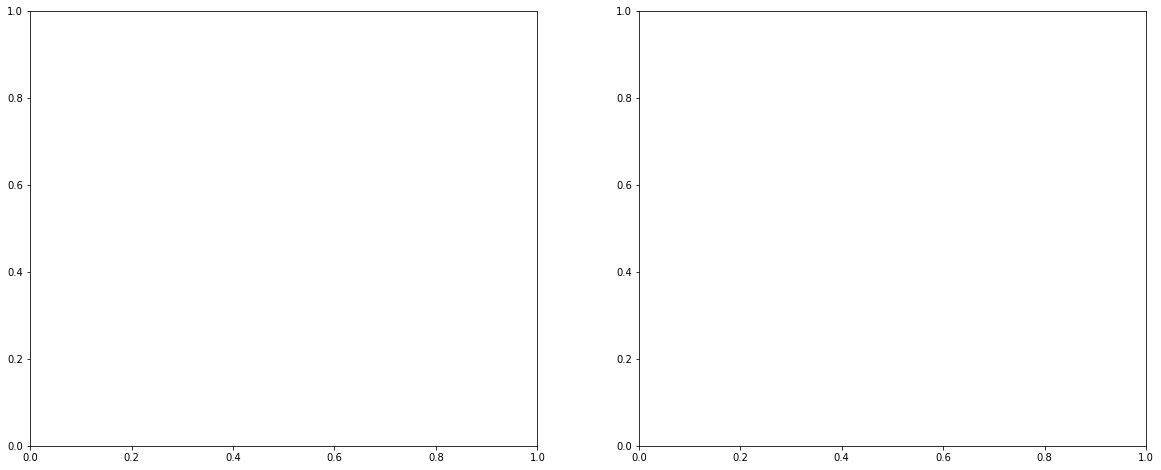

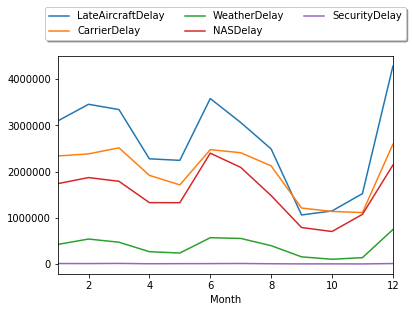

In [8]:
Delayedflights = flights[(flights.Status >= 1) &(flights.Status < 3)]

df2 = Delayedflights.filter(['Month','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis=1)
df2 = df2.groupby('Month')['LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'].sum().plot()
df2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=True)
plt.show()